# Learning Curves for Classification using MNIST dataset

## Data visualization
### Understand the dataset by plotting

This is a low-dimensinoal digit recognition dataset.

In [1]:
import warnings
warnings.filterwarnings('ignore')

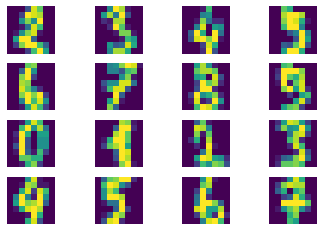

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

digits = load_digits()
X, y = digits.data, digits.target

for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(X[i+1].reshape((8,8)))
    plt.axis('off')

plt.show()


In [3]:
X.shape

(1797, 64)

### Training and Testing Split

In [4]:
from sklearn.model_selection import train_test_split


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


## Part 1: Classification Methods

1) Applying the SVM classifiers with linear kernel to view the coefficient matrix

2) Applying the SVM with Gaussian kernel with the GridSearchCV to find a good tuning parameter. 

3) Applying the Logistic Regression and visualize the coefficient for each class.

# 1.1 Linear SVM

In [6]:
parameters = [{'penalty': ['l1', 'l2'], 'loss': ['hinge', 'squared_hinge'],
                     'multi_class': ['ovr'], 'C':[0.001,0.01,0.1,1,10],
              'max_iter':[1000], 'tol':[1e-6,1e-4]}]

cv = GridSearchCV(LinearSVC(), parameters, refit = True)
cv.fit(X_train,y_train)
#cv_results_ can also be used to produce a list of all output and can rank the output in a descending order to find the best parameter. As we are interested in only the best parameters, we use best_params
print(f"Best Tuning Parameter C for Linear SVM: {cv.best_params_}")


Best Tuning Parameter C for Linear SVM: {'C': 0.001, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'tol': 1e-06}


Following are the Linear SVC model coefficient matrix:



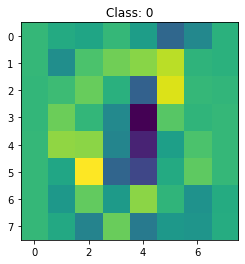

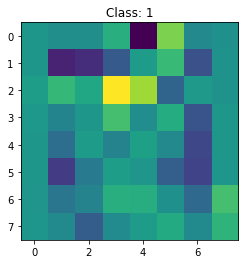

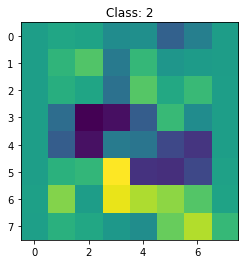

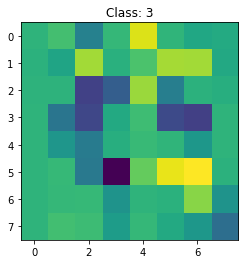

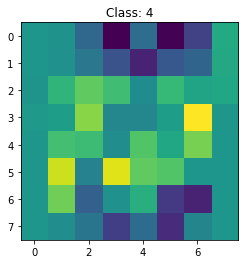

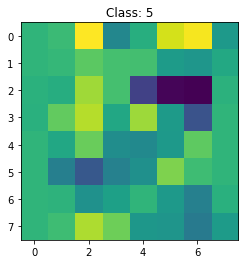

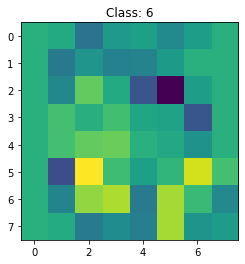

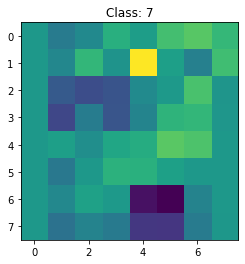

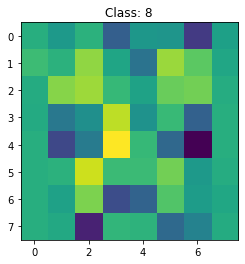

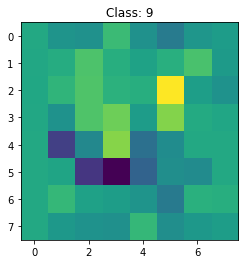

In [7]:
#From the above results the best tuning parameter are selected to plot the model coefficient 
clf = LinearSVC(C=0.001, loss= 'squared_hinge',max_iter = 1000,penalty='l2',  multi_class='ovr',  tol=1e-6)
clf.fit(X_train,y_train)
print("Following are the Linear SVC model coefficient matrix:\n")
coef1 = clf.coef_
classes1 = clf.classes_
for class_,coef_ in zip(classes1,coef1):
    plt.title("Class: "+str(class_))
    plt.imshow(coef_.reshape((8,8)))
    plt.show()

# 1.2) Kernel SVM:

In [8]:
parameters2 = [{'kernel': ['linear','rbf','polynomial'], 'gamma': ['scale',1e-3, 1e-4],
                     'C': [1, 10, 100, 1000],'tol':[1e-6,1e-3]}]

cv2 = GridSearchCV(SVC(), parameters2, refit = True)
cv2.fit(X_train, y_train)
print("Best Parameters: ",cv2.best_params_)

Best Parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'tol': 1e-06}


In [9]:
#From the above results the best tuning parameter are selected to plot the model coefficient 
# clf2 = SVC(C=10, gamma= 'scale',kernel = 'rbf',tol=1e-6)
# clf2.fit(X_train,y_train)
# print("Following are the Kernel SVC model coefficient matrix:\n")
# coef2 = clf2.coef_
# classes2 = clf2.classes_
# for class_,coef_ in zip(classes2,coef2):
#     plt.title("Class: "+str(class_))
#     plt.imshow(coef_.reshape((8,8)))
#     plt.show()
#since the coefficients are available only to linear kernel we can't plot and visualize the respective model coefficient, as we got the best kernel parameter as rbf.

# 1.3 Logistic Regression

In [10]:
parameters3= [{'penalty': ['l1','l2'], 'tol':[1e-6,1e-4],'C':[0.001,0.01,0.1,1,10,100],
                     'solver': ['newton-cg', 'lbfgs', 'saga'],'multi_class':['ovr','multinomial']}]

cv3 = GridSearchCV(LogisticRegression(), parameters3, refit = True)
cv3.fit(X_train,y_train)
print("Best Parameters for logistic Regression: ",cv3.best_params_)

Best Parameters for logistic Regression:  {'C': 1, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga', 'tol': 1e-06}


Following are the Linear Regression model coefficient matrix:



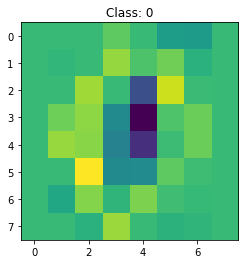

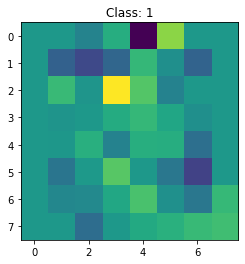

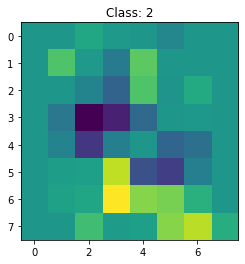

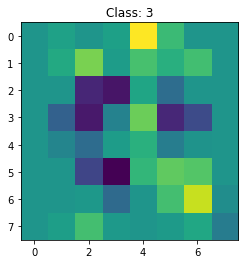

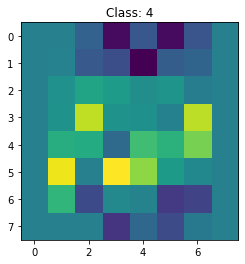

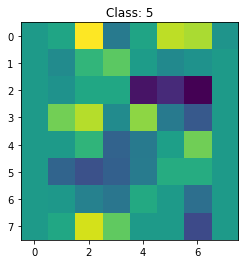

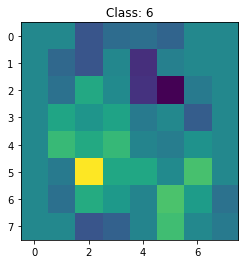

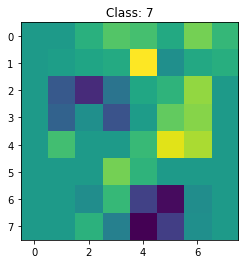

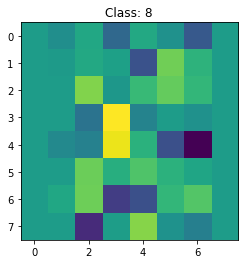

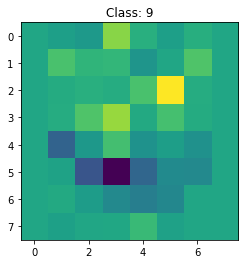

In [11]:
#From the above results the best tuning parameter are selected to plot the model coefficient 
clf3 = LogisticRegression(C=1, multi_class= 'multinomial',penalty = 'l1',solver='saga', tol=1e-06)
clf3.fit(X_train,y_train)
print("Following are the Linear Regression model coefficient matrix:\n")
coef3 = clf3.coef_
classes3 = clf3.classes_
for class_,coef_ in zip(classes3,coef3):
    plt.title("Class: "+str(class_))
    plt.imshow(coef_.reshape((8,8)))
    plt.show()

## Part 2: Plotting Learning Curves

We would like to plot the learning curve of the data. The following code is taken from the following this [example](http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html), where we can use the function of [learning curve](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve) to plot the learning curve in the class. 



In [12]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt




Same code for learning curve for Naive Bayes [example](http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html) to understand how to plot the learning curve and the following Demo. For here the default score is cross-validation. 
 


### Naive Bayesian Demo

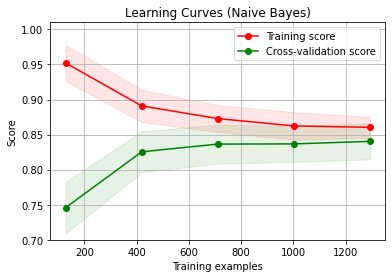

In [13]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()


# Part 2

1) Applying the three classifiers as in Part 1 and compute the learning curve on this dataset. 
- SVM classifiers with linear kernel
- SVM with Gaussian kernel
- Logistic Regression

# 2.1) SVM classifiers with linear kernel

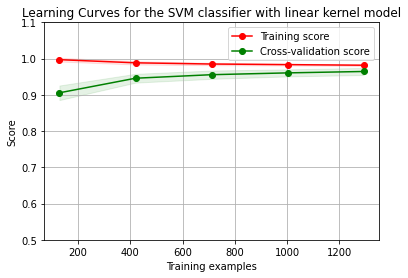

In [14]:
title = "Learning Curves for the SVM classifier with linear kernel model"
cross_val1 = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
param1 = LinearSVC(penalty='l2', loss= 'squared_hinge', C=0.001, multi_class='ovr', max_iter = 10000, tol=1e-6)
plot_learning_curve(param1, title, X_train, y_train, ylim=(0.5, 1.1), cv=cross_val1, n_jobs=4)
plt.show()

# 2.2) SVM with Gaussian kernel 

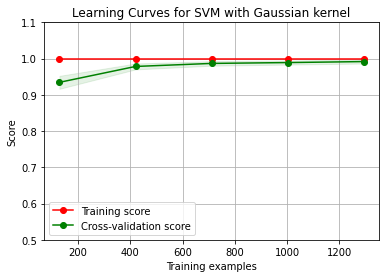

In [15]:
title = "Learning Curves for SVM with Gaussian kernel"
cross_val2 = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
param2 = SVC(kernel = 'rbf', C= 10, tol=1e-6, gamma= 'scale')
plot_learning_curve(param2, title, X_train, y_train, ylim=(0.5, 1.1), cv=cross_val2, n_jobs=4)
plt.show()

# 2.3) Logistic Regression

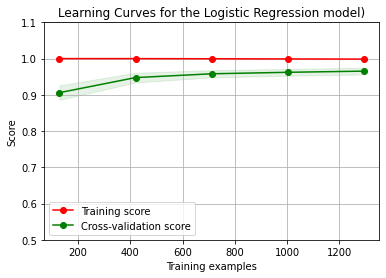

In [16]:
title = "Learning Curves for the Logistic Regression model)"
cross_val3 = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
param3 = LogisticRegression(C=1, multi_class= 'multinomial',penalty = 'l1',solver='saga', tol=1e-06)
plot_learning_curve(param3, title, X_train, y_train, ylim=(0.5, 1.1), cv=cross_val3, n_jobs=4)
plt.show()

## Part 3: Use Sklearn Feature extractor

In [17]:
from skimage.feature import hog
digits = load_digits()
X, y = digits.data, digits.target


from sklearn.ensemble import RandomForestClassifier
list_hog = []
for feature in X:
    fd = hog(feature.reshape((8,8)), orientations=9, pixels_per_cell=(2,2),cells_per_block=(2,2),visualise=False )
    list_hog.append(fd)
hog_features = np.array(list_hog, 'float64')


In [18]:
from sklearn.model_selection import train_test_split
X_train_fea, X_test_fea, y_train, y_test = train_test_split(hog_features, y, test_size=0.1, random_state=42)


Plotting the learning curve for the following methods: 

- SVM classifiers with linear kernel
- SVM with Gaussian kernel
- Logistic Regression


# 3.1) SVM classifiers with linear kernel - HOG method

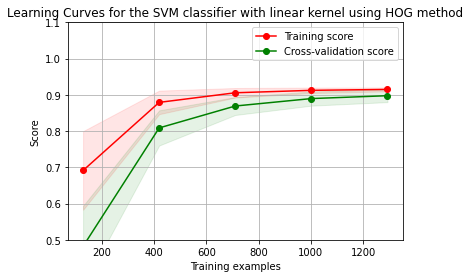

In [19]:
title = "Learning Curves for the SVM classifier with linear kernel using HOG method"

cross_val_hog1 = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
param_hog1 = LinearSVC(penalty='l2', loss= 'squared_hinge', C=0.001, multi_class='ovr', max_iter = 10000, tol=1e-6)
plot_learning_curve(param_hog1, title, X_train_fea, y_train, ylim=(0.5, 1.1), cv=cross_val_hog1, n_jobs=4)
plt.show()

# 3.2) SVM with Gaussian kernel using HOG method

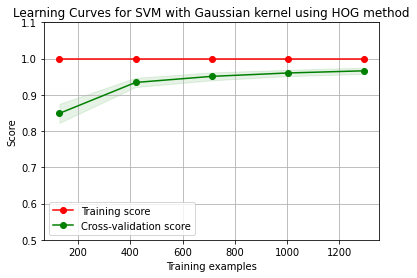

In [20]:
title = "Learning Curves for SVM with Gaussian kernel using HOG method"
cross_val_hog2 = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
param_hog2 = SVC(kernel = 'rbf', C= 10, tol=1e-6, gamma= 'scale')
plot_learning_curve(param_hog2, title, X_train_fea, y_train, ylim=(0.5, 1.1), cv=cross_val_hog2, n_jobs=4)
plt.show()

# 3.3) Logistic Regression using HOG method

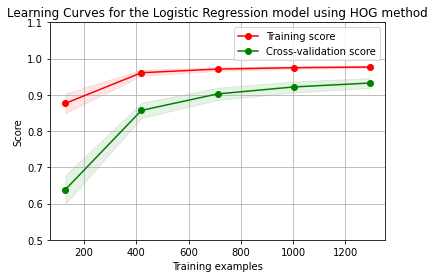

In [21]:
title = "Learning Curves for the Logistic Regression model using HOG method"
cross_val_hog3 = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
param_hog3 = LogisticRegression(C=1, multi_class= 'multinomial',penalty = 'l1',solver='saga', tol=1e-06)
plot_learning_curve(param_hog3, title, X_train_fea, y_train, ylim=(0.5, 1.1), cv=cross_val_hog2, n_jobs=4)
plt.show()